##Modelling Pipeline

In [1]:
!python --version

Python 3.7.13


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# read in data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv'

df = pd.read_csv(url)
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [7]:
# set data types

df['ref'] = df['ref'].astype('string')
#df['company_manufacturer'] = pd.to_numeric(df['company_manufacturer'], errors='coerce')
df['company_manufacturer'] = df['company_manufacturer'].astype('string')
df['company_location'] = df['company_location'].astype('string')
#df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
#df['review_date'] = df['review_date'].astype('string')
df['country_of_bean_origin'] = df['country_of_bean_origin'].astype('string')
df['specific_bean_origin_or_bar_name'] = df['specific_bean_origin_or_bar_name'].astype('string')

df['cocoa_percent'] = df['cocoa_percent'].astype('string') # to string
df['cocoa_percent'] = df['cocoa_percent'].str.replace('%','') # remove %
df['cocoa_percent'] = pd.to_numeric(df['cocoa_percent'], errors='coerce')
df['ingredients'] = df['ingredients'].astype('string')
df['most_memorable_characteristics'] = df['most_memorable_characteristics'].astype('string')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   string 
 1   company_manufacturer              2530 non-null   string 
 2   company_location                  2530 non-null   string 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   string 
 5   specific_bean_origin_or_bar_name  2530 non-null   string 
 6   cocoa_percent                     2530 non-null   float64
 7   ingredients                       2443 non-null   string 
 8   most_memorable_characteristics    2530 non-null   string 
 9   rating                            2530 non-null   float64
dtypes: float64(2), int64(1), string(7)
memory usage: 197.8 KB


###EDA

####Univariate Analysis

In [9]:
df.describe()

,review_date,cocoa_percent,rating
count,2530.000000,2530.000000,2530.000000
mean,2014.374308,71.639723,3.196344
std,3.968267,5.616724,0.445321
min,2006.000000,42.000000,1.000000
25%,2012.000000,70.000000,3.000000
50%,2015.000000,70.000000,3.250000
75%,2018.000000,74.000000,3.500000
max,2021.000000,100.000000,4.000000


In [10]:
# Check unique values per column using list comprehension - Alt 1 - Dont use this!
cols = [col for col in df]
unique_values = [unique for unique in df.nunique()]
cols_with_unique_values = list(zip(cols, unique_values))
cols_with_unique_values

[('ref', 630),
 ('company_manufacturer', 580),
 ('company_location', 67),
 ('review_date', 16),
 ('country_of_bean_origin', 62),
 ('specific_bean_origin_or_bar_name', 1605),
 ('cocoa_percent', 46),
 ('ingredients', 21),
 ('most_memorable_characteristics', 2487),
 ('rating', 12)]

In [11]:
# Check unique values per column using built in pandas method - Alt 2 - Use this!
print(df.nunique())

ref                                  630
company_manufacturer                 580
company_location                      67
review_date                           16
country_of_bean_origin                62
specific_bean_origin_or_bar_name    1605
cocoa_percent                         46
ingredients                           21
most_memorable_characteristics      2487
rating                                12
dtype: int64


In [12]:
df_num = df[['cocoa_percent','rating']]
df_num.head(1)

,cocoa_percent,rating
0,76.0,3.25


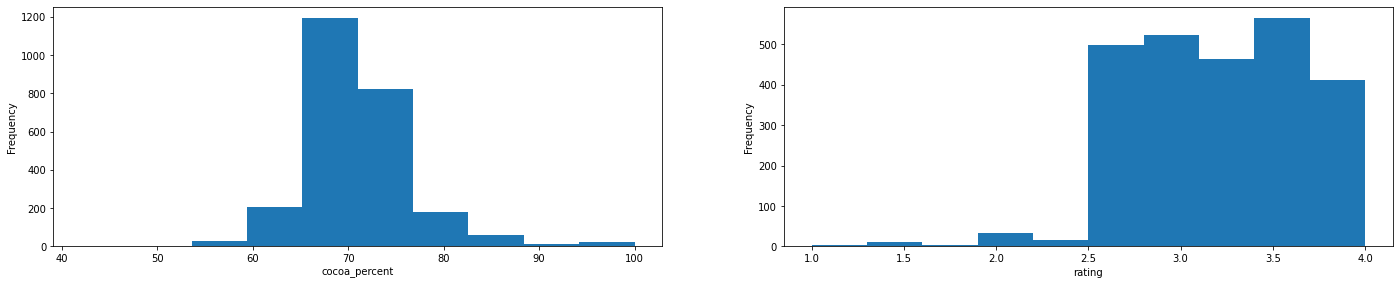

In [13]:
fig = plt.figure(figsize=(24,15))
i = 0

for column in df_num:
  sub = fig.add_subplot(3,2, i + 1)
  sub.set_xlabel(column)
  df[column].plot(kind = 'hist')
  i =+ 1

In [14]:
# create binary label of rating
df['label'] = np.where(df['rating'] > 3, True, False)

In [ ]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,label
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,True
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,True
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,True
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,False
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,False


In [15]:
import seaborn as sns

####Categorical Features

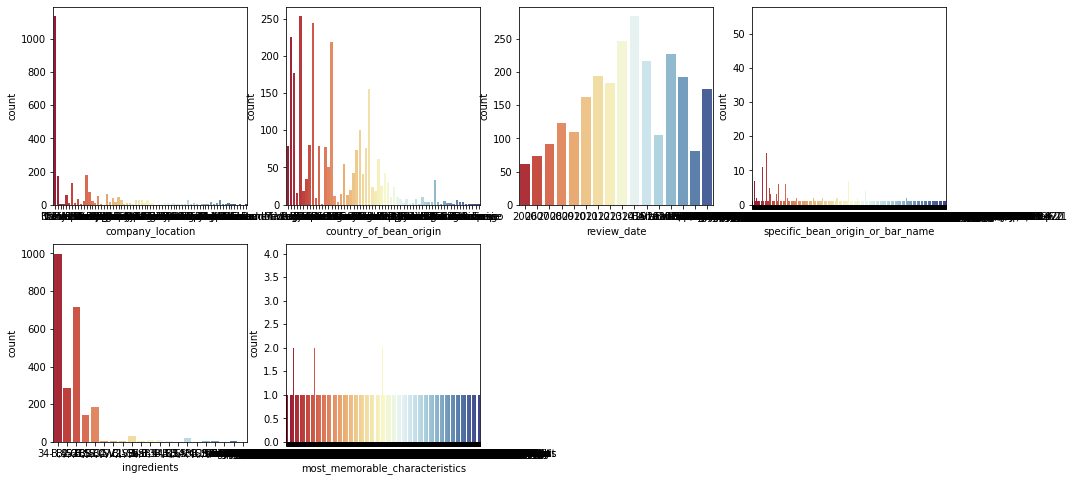

In [16]:
cat_list = ["company_location","country_of_bean_origin","review_date","specific_bean_origin_or_bar_name","ingredients","most_memorable_characteristics"]
fig= plt.figure(figsize=(16,8))

for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(2, 4, i + 1)
  chart = sns.countplot(data = df,
                        x = column,
                        #hue = 'label',
                        palette = 'RdYlBu')


From above we see that there are too many values of the categorical features for the plot to be meaningfull

In [17]:
df_us = df[df['company_location']=='U.S.A.']
print(df_us.shape)
df_us.head()

(1136, 11)


,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,label
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,True
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,True
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,True
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00,False
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00,False


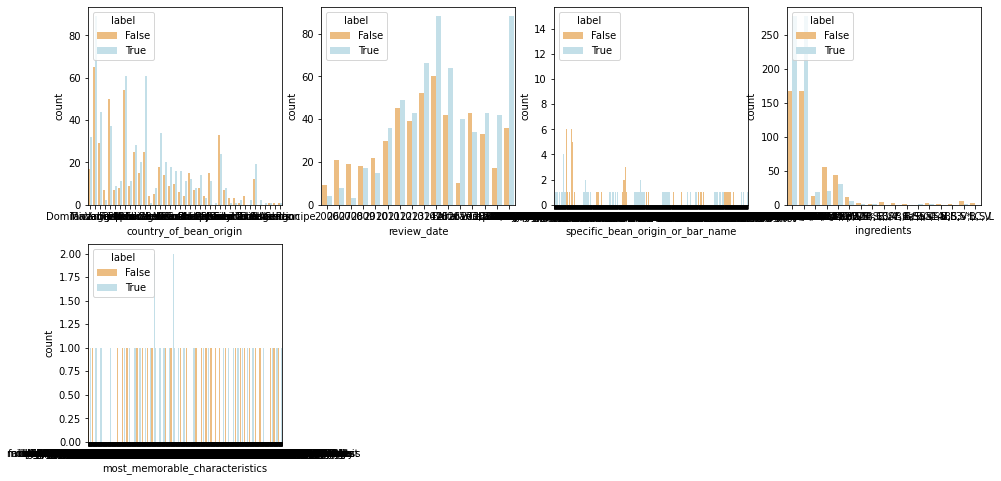

In [18]:
cat_list = ["country_of_bean_origin","review_date","specific_bean_origin_or_bar_name","ingredients","most_memorable_characteristics"]
fig= plt.figure(figsize=(16,8))

for i in range(len(cat_list)):
  column = cat_list[i]
  sub = fig.add_subplot(2, 4, i + 1)
  chart = sns.countplot(data = df_us,
                        x = column,
                        hue = 'label',
                        palette = 'RdYlBu')

####Numerical Features vs Target in Box Plot

In [ ]:
# box plot TBD
num_list = ['']

In [22]:
df_num  = df[['cocoa_percent','review_date']]
df_num.head()

,cocoa_percent,review_date
0,76.0,2019
1,76.0,2019
2,76.0,2019
3,68.0,2021
4,72.0,2021


In [26]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df_num
y = df[['label']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###Machine Learning Model Pipeline

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

###Model Evaluation

In [38]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list =['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc_list.append(metrics.accuracy_score(y_test, y_pred))
  fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
  auc_list.append(metrics.auc(fpr, tpr))
  #auc_list.append(metrics.auc(fpr, trp),2))
  cm_list.append(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

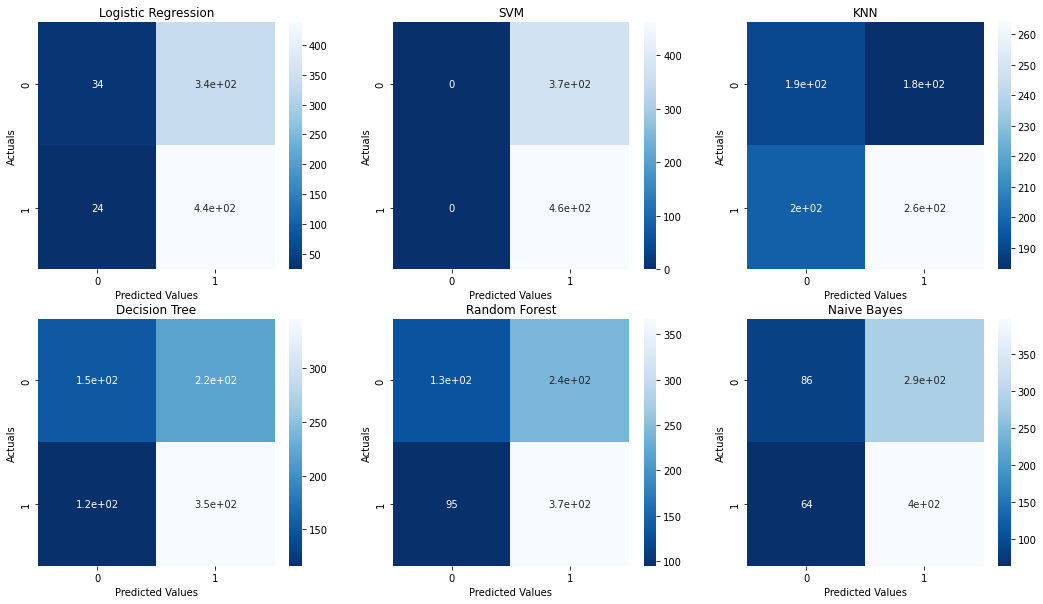

In [39]:
# plot confusion matrix
fig = plt.figure(figsize = (18, 10))

for i in range(len(cm_list)):
  cm = cm_list[i]
  model = model_list[i]
  sub = fig.add_subplot(2, 3, i+1).set_title(model)
  cm_plot =sns.heatmap(cm, annot=True, cmap= 'Blues_r')
  cm_plot.set_xlabel('Predicted Values')
  cm_plot.set_ylabel('Actuals')


In [40]:
# accuracy 
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,Logistic Regression,0.565269,0.519602
1,SVM,0.553293,0.500000
2,KNN,0.543713,0.540406
3,Decision Tree,0.596407,0.578212
4,Random Forest,0.597605,0.574130
5,Naive Bayes,0.579641,0.546017


As expected the features `cocoa_percent` and `review_date` are poor at predicting the binary label of high rating, regardless of modelling approach.